# CONTROLLABILITY

Controllability is a property of the open loop system.
It's the ability of the control input, $u(t)$, to affect the measured output $y(t)$.


<img src="https://raw.githubusercontent.com/joseph-hellerstein/advanced-controls-lectures/main/short_class_lectures/images/open_loop_system.png" 
         alt="Types of feature extractiom."
         width="600">

In [1]:
!pip -q install tellurium
!pip -q install controlSBML


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
try:
    import tellurium as te
except:
    !pip -q install tellurium
    import tellurium as te
try:
    import controlSBML as ctl
except:
    !pip install controlSBML
    import controlSBML as ctl

# 1. System Description and Objectives

We are considering the glycolysis system described in the Jenna Wolf model (Model 206).
We want to regulate pyruvate.

1. Regulate pyruvate.
1. Why? We are regulating input to the Krebs cycle.
1. Control objectives
     1. Achieve a desired target value for pyruvate. 45
     1. Stability
     1. Settling time
     1. Minimize or eliminate oscillations

We will use the model of gycolytic oscillations by J Wolf, BioModels 206.

In [3]:
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL3352181362/3/BIOMD0000000206_url.xml"
CTLSB = ctl.ControlSBML(URL)
print(CTLSB.getAntimony())  # View the Antimony

// Created by libAntimony v2.15.0
model *Wolf2000_Glycolytic_Oscillations()

  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;

  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;

  // Species initializations:
  s1 = 1;
  at_ = 2;
 

# 2. Basics of Controllability

A system is controllable if the control input can change the measured output.

1. Choose a suitable input to control the system output. Plot a staircase function of the input over the operating region. Specify:
      1. directional effect of the input on the output
      1. operating region for the input
      1. range of outputs that can be achieved (feasible setpoints)
1. Write a short narrative describing how the plot indicates that the control objectives can be achieved over the operating region.

* Input operating region: 30 - 50
* Output achieved: 32 - 50
* Directional effect of input on output: increasing

In [4]:
CTLSB = ctl.ControlSBML(URL, input_name="s1", output_name="s5")

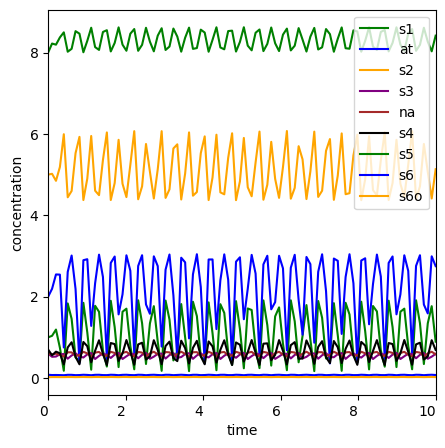

In [5]:
_ = CTLSB.plotModel()

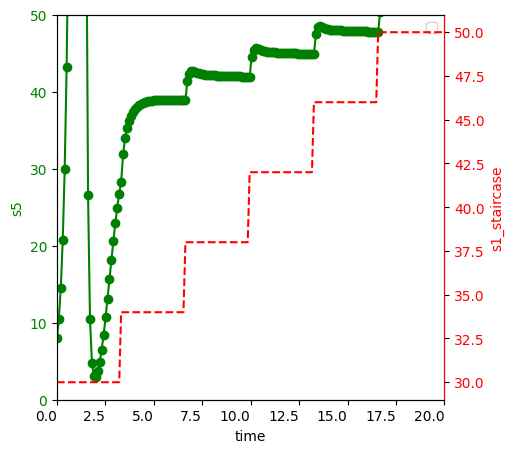

In [6]:
_ = CTLSB.plotStaircaseResponse(initial_value=30, final_value=50,
                            times=np.linspace(0, 20, 200), ylim=[0, 50])

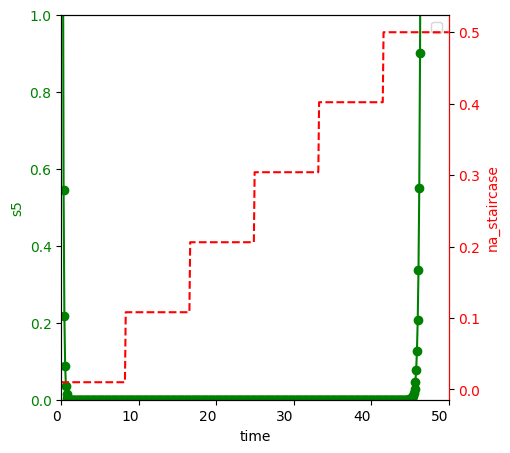

In [7]:
ctlsb = ctl.ControlSBML(URL, input_name="na", output_name="s5")
_ = ctlsb.plotStaircaseResponse(initial_value=.01, final_value=0.5,
                            times=np.linspace(0, 50, 500), ylim=[0, 1])

# 3. Control design

Propose a PID design and evaluate how well it meets your control objectives by plotting the system response.

In [8]:
?CTLSB.plotDesign

Signature:
CTLSB.plotDesign(
    kP_spec: bool = False,
    kI_spec: bool = False,
    kD_spec: bool = False,
    kF_spec: bool = False,
    setpoint: Optional[float] = 1,
    sign: Optional[float] = -1,
    times: Optional[numpy.ndarray] = None,
    num_process: Optional[int] = -1,
    num_restart: Optional[int] = 1,
    selections: Optional[List[str]] = None,
    min_parameter_value: float = 0,
    max_parameter_value: float = 10,
    num_coordinate: int = 3,
    is_report: bool = False,
    **kwargs,
) -> controlSBML.control_sbml.DesignResult
Docstring:
Plots the results of a closed loop design. The design is specified by the parameters
kP_spec, kI_spec, kD_spec, and kF_spec.
   None or False: do not include the parameter
   True: include the parameter and find a value
   float: use this value for the parameter.
Persists the closed loop design (kP, kI, kD, kF) if a design is found.

Args:
    kP_spec: float (specification of proportional gain)
    kI_spec: float (specification of in

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.00it/s]


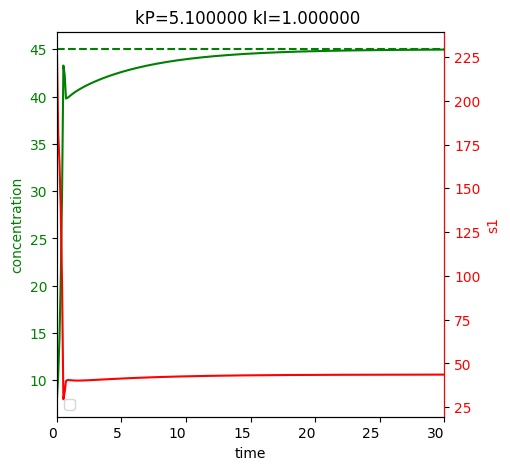

In [9]:
ctlsb = ctl.ControlSBML(URL, input_name="s1", output_name="s5")
_ = ctlsb.plotDesign(setpoint=45, kP_spec=5.1, kI_spec=1, kD_spec=0,
                            times=np.linspace(0, 30, 300))

Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.638066 and h = 4.24113e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.633663 and h = 4.15249e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.647406 and h = 1.53189e-116, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.61868 and h = 2.13284e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_ERR_FAILURE, Module: CVODES, Function: CVode, Message: At t = 1.12829 and h = 2.0773e-08, the error test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.578

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep 

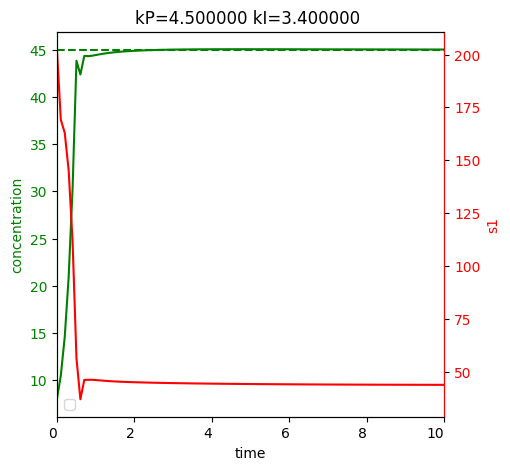

,score,kD,kI,kP,reason
0,42.924872,0.0,3.4,4.5,Design successful.
1,43.183924,0.0,3.4,3.4,Design successful.
2,43.327299,0.0,4.5,4.5,Design successful.
3,44.097513,0.0,2.3,4.5,Design successful.
4,44.296052,0.0,2.3,3.4,Design successful.
...,...,...,...,...,...
95,NaN,0.0,5.6,10.0,No design. Cannot simulate the closed loop sys...
96,NaN,0.0,4.5,7.8,No design. Cannot simulate the closed loop sys...
97,NaN,0.0,4.5,10.0,No design. Cannot simulate the closed loop sys...
98,NaN,0.0,4.5,5.6,No design. Cannot simulate the closed loop sys...


In [10]:
ctlsb = ctl.ControlSBML(URL, input_name="s1", output_name="s5")
result = ctlsb.plotDesign(setpoint=45, kP_spec=True, kI_spec=True, kD_spec=0,
    min_parameter_value=0.1, max_parameter_value=10,
    num_coordinate=10, times=np.linspace(0, 10, 100))
result.design_df

In [11]:
result.design_df

,score,kD,kI,kP,reason
0,42.924872,0.0,3.4,4.5,Design successful.
1,43.183924,0.0,3.4,3.4,Design successful.
2,43.327299,0.0,4.5,4.5,Design successful.
3,44.097513,0.0,2.3,4.5,Design successful.
4,44.296052,0.0,2.3,3.4,Design successful.
...,...,...,...,...,...
95,NaN,0.0,5.6,10.0,No design. Cannot simulate the closed loop sys...
96,NaN,0.0,4.5,7.8,No design. Cannot simulate the closed loop sys...
97,NaN,0.0,4.5,10.0,No design. Cannot simulate the closed loop sys...
98,NaN,0.0,4.5,5.6,No design. Cannot simulate the closed loop sys...


Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0245243 and h = 1.04186e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0218392 and h = 1.87917e-116, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0187263 and h = 4.14081e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0251141 and h = 5.87827e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
Error: CVODE Error: CV_CONV_FAILURE, Module: CVODES, Function: CVode, Message: At t = 0.0222874 and h = 1.67662e-117, the corrector convergence test failed repeatedly or with |h| = hmin.
  1%|          | 1/100 [00:01<01:51,  1.12s/it]Error: CVODE Error

CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)
CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep 

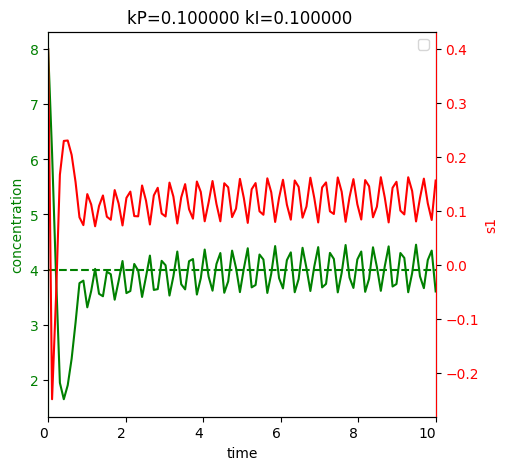

,score,kD,kI,kP,reason
0,0.469423,0.0,0.1,0.1,Design successful.
1,NaN,0.0,5.6,3.4,No design. Cannot simulate the closed loop sys...
2,NaN,0.0,1.2,7.8,No design. Cannot simulate the closed loop sys...
3,NaN,0.0,7.8,2.3,No design. Cannot simulate the closed loop sys...
4,NaN,0.0,5.6,10.0,No design. Cannot simulate the closed loop sys...
...,...,...,...,...,...
95,NaN,0.0,2.3,0.1,No design. Cannot simulate the closed loop sys...
96,NaN,0.0,2.3,3.4,No design. Cannot simulate the closed loop sys...
97,NaN,0.0,10.0,0.1,No design. Cannot simulate the closed loop sys...
98,NaN,0.0,4.5,6.7,No design. Cannot simulate the closed loop sys...


In [12]:
result = CTLSB.plotDesign(setpoint=4, kP_spec=True, kI_spec=True, kD_spec=0,
    min_parameter_value=0.1, max_parameter_value=10,
    num_coordinate=10,
                            times=np.linspace(0, 10, 100))
result.design_df

# 4. Evaluate the control design

Discuss how well you were able to achieve your control objectives.